In [1]:
import os
from tqdm.notebook import tqdm
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
user_profile = os.environ['HOME']

# Note that you are not allowed to use test data for training.
# set the path to the downloaded data:
data_path = '%s/data/EE148/RedLights2011_Medium' % user_profile

# get sorted list of files: 
file_names = sorted(os.listdir(data_path)) 

# remove any non-JPEG files: 
file_names = [f for f in file_names if '.jpg' in f]

# load splits: 
split_path = '%s/data/EE148/hw02_splits' % user_profile
file_names_train = np.load(os.path.join(split_path,'file_names_train.npy'))
file_names_test = np.load(os.path.join(split_path,'file_names_test.npy'))

# set a path for saving predictions:
preds_path = '%s/data/EE148/hw02_preds' % user_profile
os.makedirs(preds_path, exist_ok=True) # create directory if needed

# Set this parameter to True when you're done with algorithm development:
done_tweaking = False

In [3]:
def show_img(I, img_name, rect_list):
#     I = Image.open(os.path.join(data_path,img_name))
#     I = np.asarray(I)
    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_figwidth(5)
    fig.set_figheight(5)
    # Display the image
    ax.imshow(I)
    for rect in rect_list:
        tl_row, tl_col, br_row, br_col = rect
        # Create a Rectangle patch
        rect = patches.Rectangle((tl_col-1, tl_row-1), br_col-tl_col, br_row-tl_row,
                                 linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.title(img_name)
    plt.show()
    #plt.savefig(img_name)

In [4]:
def get_ref_red_lights():
    """Get some reference images of red lights from the first image."""
    coords_dict = {
#         0: [[154, 316, 171, 323], [180, 67, 205, 79], [192, 419, 207, 428]],
#         1: [[175, 322, 197, 332], [215, 44, 245, 59], [222, 400, 245, 410]],
        2: [[232, 121, 255, 129], [199, 278, 219, 292], [202, 335, 220, 342], [243, 414, 265, 423]],
        9: [[13, 122, 85, 174], [25, 320, 94, 350], [174, 600, 241, 629]]
    }    
    ref = []
    for i in coords_dict:
        img_name = file_names[i]
        I = Image.open(os.path.join(data_path,img_name))
        I = np.asarray(I)
        for coords_list in coords_dict[i]:
            tl_row, tl_col, br_row, br_col = top_row, left_col, bot_row, right_col = coords_list
            obj = I[top_row:bot_row, left_col:right_col, :]
            show_img(obj, img_name, [])
            ref.append(obj)
    return ref

In [5]:
def get_red_coords(I):
    """Get coordinates of pixels in the image where there is large red value."""
    coords = []
    (n_rows,n_cols,n_channels) = np.shape(I)
    for i in range(0, n_rows-10, 3):
        for j in range(0, n_cols, 3):
            if (I[i, j, 0] > 200 and I[i, j, 0] > I[i, j, 1]+50 and I[i, j, 0] > I[i, j, 2]+50 and \
                I[i+10, j, 0] < 100 and I[i+10, j, 1] < 100 and I[i+10, j, 2] < 100) or \
            (I[i, j, 0] > 100 and I[i, j, 0] > int(I[i, j, 1]) + int(I[i, j, 2]) and I[i+10, j, 0] < 50):
                for k in range(15):
                    if i-k >= 0 and j-k >= 0:
                        coords.append((i-k, j-k))
#     a = np.zeros((n_rows, n_cols, n_channels))
#     for (i, j) in coords:
#         a[i, j] = 1
#     plt.imshow(a)
#     plt.show()
    return coords

# def get_red_coords(I):
#     """Get coordinates of pixels in the image where there is large red value."""
#     coords = []
#     (n_rows,n_cols,n_channels) = np.shape(I)
#     for i in range(0, n_rows-5, 3):
#         for j in range(0, n_cols-20, 3):
#             if (I[i, j, 0] > 200 and i <= 5 or \
#                 (I[i - 5, j, 1] < 100 and I[i + 5, j+20, 1] < 100 and \
#                 I[i - 5, j, 2] < 100 and I[i + 5, j+20, 2] < 100) and \
#                 I[i, j+20, 0] < 100 and I[i, j+20, 1] < 100 and I[i, j+20, 2] < 100) or \
#             (I[i, j, 0] > 100 and I[i, j, 0] > int(I[i, j, 1]) + int(I[i, j, 2]) and I[i, j+10, 0] < 50):
#                 for k in range(i-5, i+5, 2):
#                     for l in range(j, j+5, 2):
#                         coords.append((k, l))
# #                     if i-k >= 0 and j-k >= 0:
# #                         coords.append((i-k, j-k))
#     a = np.zeros((n_rows, n_cols, n_channels))
#     for (i, j) in coords:
#         a[i, j] = 1
#     plt.imshow(a)
#     plt.show()
#     return coords

In [6]:
# for T in templates:
#     get_red_coords(T)

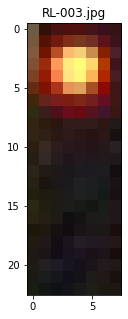

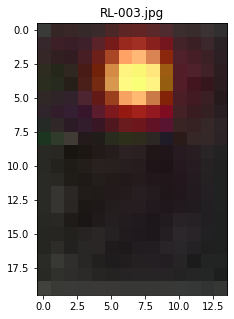

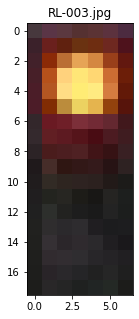

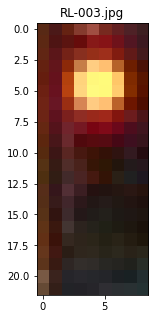

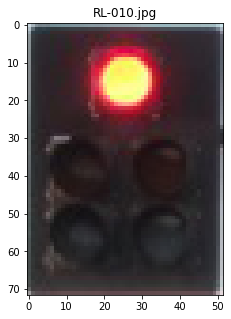

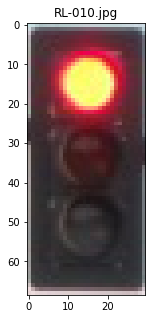

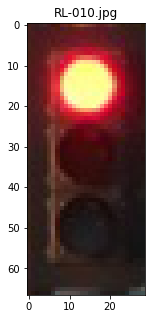

In [7]:
templates = get_ref_red_lights()

In [8]:
def compute_convolution(I, I_red_coords, T, stride=None):
    '''
    This function takes an image <I> and a template <T> (both numpy arrays) 
    and returns a heatmap where each grid represents the output produced by 
    convolution at each location. You can add optional parameters (e.g. stride, 
    window_size, padding) to create additional functionality. 
    '''
    (n_rows,n_cols,n_channels) = np.shape(I)

    '''
    BEGIN YOUR CODE
    '''
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             test_I = I[i:i+T_height,j:j+T_width]
#             for test_i in range(T_height):
#                 for test_j in range(T_width):
#                     test_T = np.ones(3)*T[test_i, test_j]
#                     dist = np.dot(test_I[test_i, test_j], test_T)
#                     heatmap_i = i + T_height // 2
#                     heatmap_j = j + T_width // 2
#                     heatmap[heatmap_i, heatmap_j] = np.arccos(dist) / np.pi

    # Replace arccos with faster operation
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             test_I = I[i:i+T_height,j:j+T_width]
#             for test_i in range(T_height):
#                 for test_j in range(T_width):
#                     test_T = np.ones(3)*T[test_i, test_j]
#                     dist = (np.dot(test_I[test_i, test_j], test_T) + 1) / 2
#                     heatmap_i = i + T_height // 2
#                     heatmap_j = j + T_width // 2
#                     heatmap[heatmap_i, heatmap_j] = dist
                    
    # Take means of I and T
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             test_I = I[i:i+T_height,j:j+T_width]
#             mean_test_I = np.mean(test_I, axis=(0,1))
#             mean_test_T = np.ones(3)*np.mean(T)
#             dist = (np.dot(mean_test_I, mean_test_T) + 1) / 2
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             heatmap[heatmap_i, heatmap_j] = np.clip(dist,-1.0,1.0)

    # Look at specific I coordinate, but take mean of T
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             test_I = I[heatmap_i, heatmap_j]
#             mean_test_T = np.ones(3)*np.mean(T)
#             dist = (np.dot(test_I, mean_test_T) + 1) / 2
#             heatmap[heatmap_i, heatmap_j] = np.clip(dist,-1.0,1.0)
            
    # Look at 3-channel T
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width, num_channels = np.shape(T)
#     mean_test_T = np.mean(T, axis=(0,1))
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             test_I = I[heatmap_i, heatmap_j]
#             dist = get_dist(test_I, mean_test_T)
#             heatmap[heatmap_i, heatmap_j] = dist
    
    # Add stride to kernel
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width, num_channels = np.shape(T)
#     mean_test_T = np.mean(T, axis=(0,1))
#     for i in tqdm(range(0, n_rows-T_height, 2)):
#         for j in range(0, n_cols-T_width, 2):
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             test_I = I[heatmap_i, heatmap_j]
#             dist = get_dist(test_I, mean_test_T)
#             heatmap[heatmap_i, heatmap_j] = dist
            
    # Use only red coordinates
    heatmap = np.zeros((n_rows, n_cols))
    T_height, T_width, num_channels = np.shape(T)
    mean_test_T = np.mean(T, axis=(0,1))
    for (i, j) in I_red_coords:
        heatmap_i = i + T_height // 2
        heatmap_j = j + T_width // 2
        if heatmap_i < n_rows and heatmap_j < n_cols:
            test_I = I[heatmap_i, heatmap_j]
            dist = get_dist(test_I, mean_test_T)
            heatmap[heatmap_i, heatmap_j] = dist
    '''
    END YOUR CODE
    '''

    return heatmap

In [9]:
def get_dist(v1, v2):
    """Get the angle between two vectors, and confert to a distance between 0 and 1."""
    if np.linalg.norm(v1) > 0 and np.linalg.norm(v2) > 0:
        unit_vector_1 = v1 / np.linalg.norm(v1)
        unit_vector_2 = v2 / np.linalg.norm(v2)
        dot_product = np.dot(unit_vector_1, unit_vector_2)
        return np.clip(np.arccos(dot_product)/np.pi,0,1.0)
    else:
        return np.random.rand()

In [14]:
def predict_boxes(heatmap):
    '''
    This function takes heatmap and returns the bounding boxes and associated
    confidence scores.
    '''
    output = []

    '''
    BEGIN YOUR CODE
    '''
    
    (n_rows,n_cols) = np.shape(heatmap)
    box_dims = [np.shape(T)[:2] for T in templates]
    threshold = 0.025

    
    for box_dim in box_dims:
        box_height, box_width = box_dim
        i, j = 0, 0
        while i < n_rows-box_height:
            while j < n_cols - box_width:
                candidate_box = heatmap[i:i+box_height, j:j+box_width]
                score = np.max(candidate_box)
                if score > threshold:
                    print(score)
                    tl_row = i
                    tl_col = j
                    br_row = i + box_height
                    br_col = j + box_width
                    output.append([tl_row,tl_col,br_row,br_col, score])
                    j += box_width
                else:
                    j += 5
            i += 5

    '''
    END YOUR CODE
    '''

    return output

In [15]:
def detect_red_light_mf(I):
    '''
    This function takes a numpy array <I> and returns a list <output>.
    The length of <output> is the number of bounding boxes predicted for <I>. 
    Each entry of <output> is a list <[row_TL,col_TL,row_BR,col_BR,score]>. 
    The first four entries are four integers specifying a bounding box 
    (the row and column index of the top left corner and the row and column 
    index of the bottom right corner).
    <score> is a confidence score ranging from 0 to 1. 

    Note that PIL loads images in RGB order, so:
    I[:,:,0] is the red channel
    I[:,:,1] is the green channel
    I[:,:,2] is the blue channel
    '''

    '''
    BEGIN YOUR CODE
    '''
    output = []
    I_red_coords = get_red_coords(I)
    hms = []
    for T in templates:
        # You may use multiple stages and combine the results
        hms.append(compute_convolution(I, I_red_coords, T))
    heatmap = np.mean(hms, axis=0)
    output.extend(predict_boxes(heatmap))
    if len(output) > 0:
        plt.imshow(heatmap)
        plt.savefig('heatmap.png') 
        plt.show()

    '''
    END YOUR CODE
    '''

    for i in range(len(output)):
        assert len(output[i]) == 5
        assert (output[i][4] >= 0.0) and (output[i][4] <= 1.0)

    return output

  0%|          | 0/283 [00:00<?, ?it/s]

0.025646985356889102
0.03349670097981456
0.025646985356889102
0.03349670097981456
0.025646985356889102
0.03349670097981456
0.025646985356889102
0.03349670097981456
0.025646985356889102
0.06203036424463234
0.025646985356889102
0.06203036424463234
0.025646985356889102
0.06203036424463234


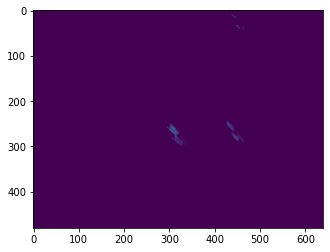

14


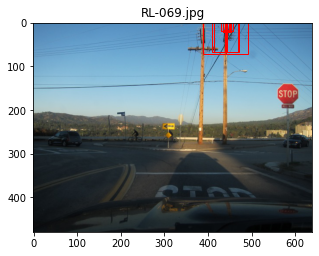

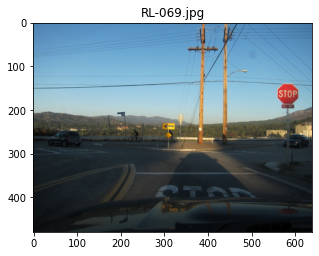

0.04771770577648972
0.08544970585600684


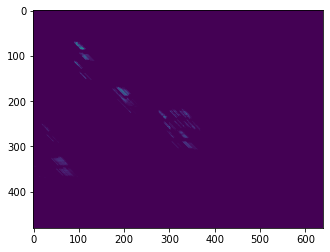

2


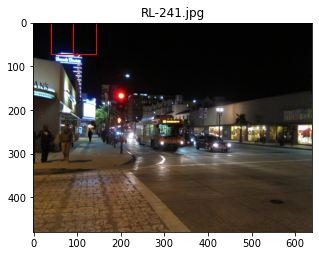

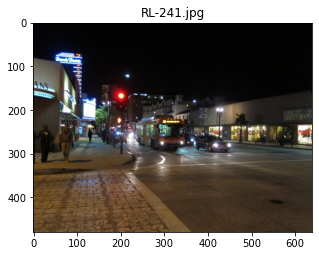

0.03095579761662755
0.03226994042774878
0.030196127798963118
0.034056562234867645
0.03226994042774878
0.02993035410124693
0.032159594704341835
0.03225661421654219
0.030196127798963118
0.034056562234867645
0.032660722623694835
0.03226994042774878
0.03137691857748817
0.032159594704341835
0.032159594704341835
0.030196127798963118
0.034056562234867645
0.030196127798963118
0.028321842570241697


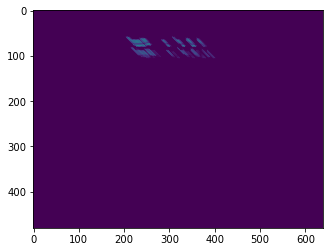

19


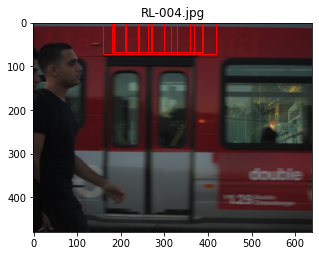

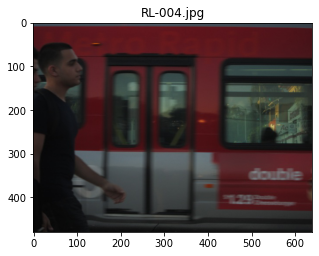

0.029412791540386514
0.04517302720971149
0.03100406036056088
0.032980917255300626
0.029412791540386514
0.04517302720971149
0.03340667851672353
0.03100406036056088
0.031985574959852846
0.029412791540386514
0.04517302720971149
0.03340667851672353
0.03100406036056088
0.031985574959852846


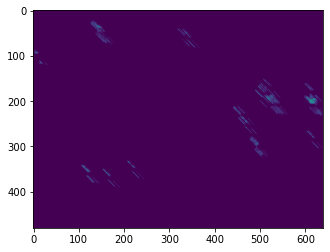

14


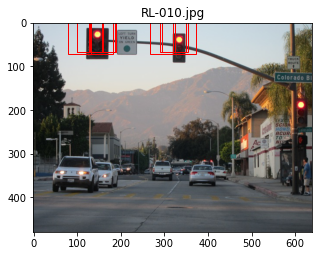

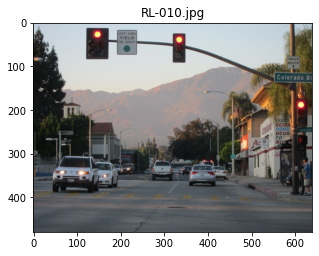

0.03824205586998873
0.03751545461955489
0.03824205586998873
0.0701695826900234
0.03824205586998873
0.0701695826900234
0.03751545461955489
0.0701695826900234


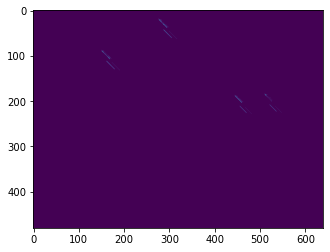

8


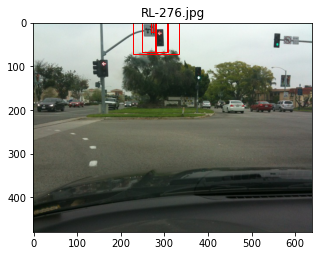

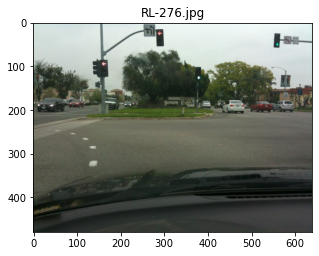

0.041575568576076846
0.041575568576076846
0.041575568576076846
0.041575568576076846
0.041575568576076846
0.041575568576076846
0.041575568576076846


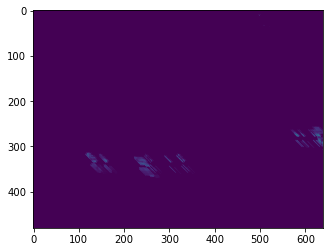

7


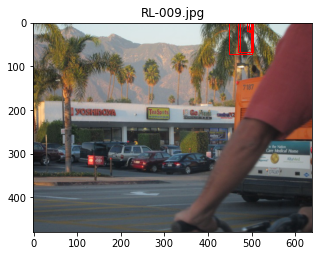

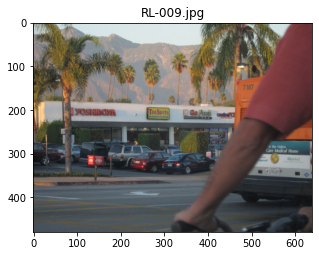

0.06611106151850694
0.05471809291924309
0.051614824573609046
0.06611106151850694
0.06611106151850694
0.053962939882379816


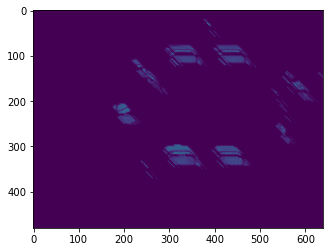

6


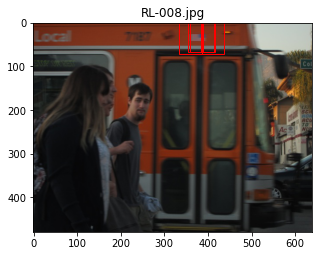

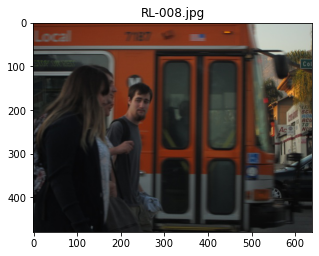

0.028633221089593233
0.04540477271029951
0.04135930640247406
0.03332132296178642
0.028633221089593233
0.04540477271029951
0.03423261535199044
0.028633221089593233
0.032320224677941135
0.04540477271029951
0.03423261535199044
0.028633221089593233
0.04540477271029951
0.04135930640247406
0.028779323672182795
0.030815705201898174
0.028633221089593233
0.04540477271029951
0.030815705201898174
0.028633221089593233
0.04540477271029951
0.031309949559685135
0.030815705201898174
0.028584956249578845
0.028633221089593233
0.04540477271029951
0.031309949559685135


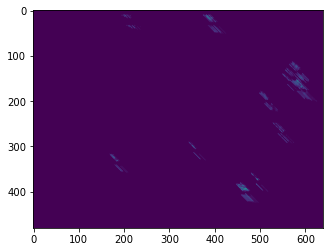

27


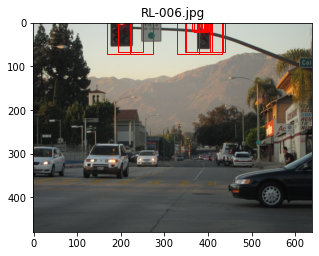

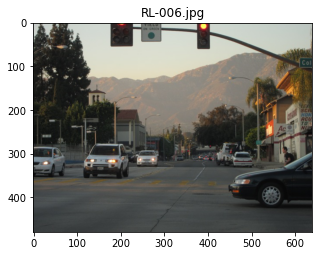

0.04032426379284044
0.038371082265142874
0.035891405713680546
0.04032426379284044
0.0357135801364715
0.031240398826249342


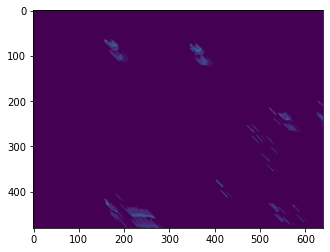

6


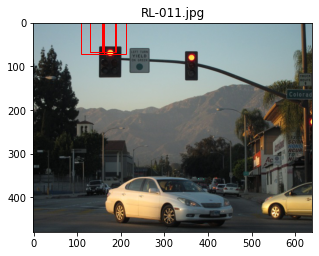

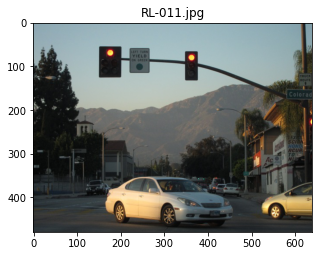

0.04020395620744351
0.04174795528812975
0.035791204282043576
0.040616921467190883
0.03432697731190809
0.04256573680698856
0.04427387338352867
0.027532860793590273
0.04020395620744351
0.04174795528812975
0.040616921467190883
0.04427387338352867
0.0381735768686242
0.029105116673762747
0.04174795528812975
0.035245518175033734
0.040616921467190883
0.032760679009695495
0.02761761370099172
0.040343857334164936
0.04427387338352867
0.04020395620744351
0.04174795528812975
0.040616921467190883
0.03708233499202709
0.03432697731190809
0.04427387338352867
0.027532860793590273
0.04284578213373807
0.06710657276025318
0.0285299583552443
0.06710657276025318
0.043156324410918726
0.06131339182274035
0.0285299583552443
0.06710657276025318
0.043156324410918726
0.045134551777607654


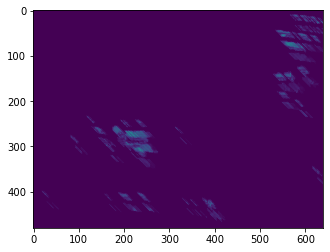

38


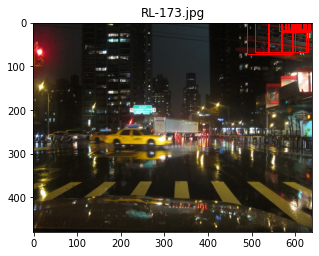

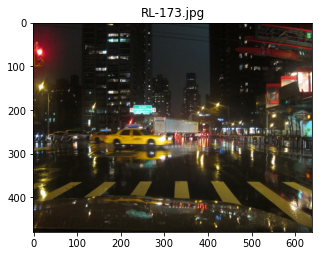

0.02785196995482323
0.02740075531771918


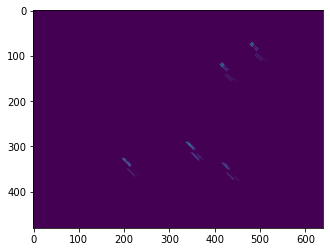

2


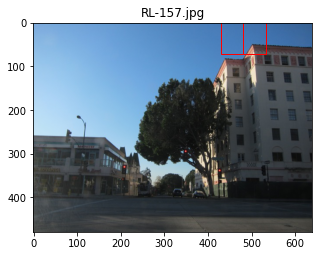

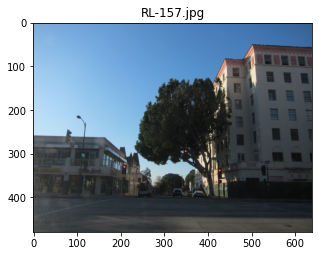

0.03317949121365046
0.04145867633520901
0.038605777673786985
0.03426326736007532
0.03317949121365046
0.04145867633520901
0.03426326736007532
0.03317949121365046
0.028826861556386862
0.04145867633520901
0.03426326736007532
0.027232735974462276
0.03317949121365046
0.04145867633520901
0.038605777673786985
0.03426326736007532
0.025897350754829927
0.03317949121365046
0.04145867633520901
0.025897350754829927
0.03317949121365046
0.04145867633520901
0.025897350754829927
0.03317949121365046
0.04145867633520901
0.025200140647260925


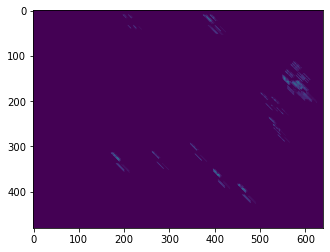

26


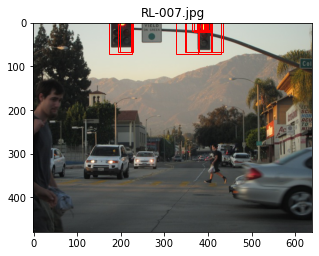

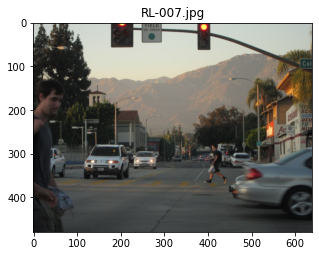

0.02774600521119969
0.02740075531771918


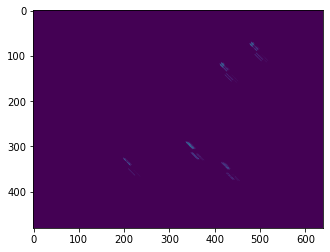

2


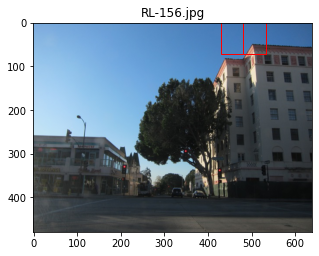

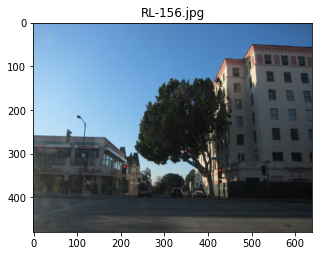

0.028609223418042156
0.03387557713109228
0.02603926243880545
0.03125414918524886
0.03280722412351825
0.032617021063234726
0.03182443557454449
0.03361389559322635
0.03298169438211922
0.02603926243880545
0.03125414918524886
0.03280722412351825
0.032617021063234726
0.03361389559322635
0.02603926243880545
0.03125414918524886
0.03280722412351825
0.032617021063234726
0.02724806186888578
0.03361389559322635
0.03387557713109228
0.02603926243880545
0.03125414918524886
0.03280722412351825
0.032617021063234726
0.02724806186888578
0.03361389559322635
0.029541801410153983
0.035338570754023614
0.03280722412351825
0.03361389559322635
0.029541801410153983
0.03387557713109228
0.035338570754023614
0.03280722412351825
0.03361389559322635
0.028609223418042156
0.03387557713109228
0.035338570754023614
0.03280722412351825
0.03361389559322635


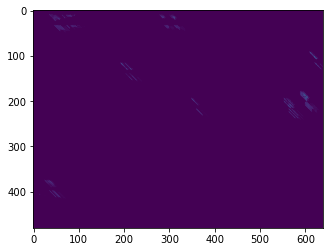

41


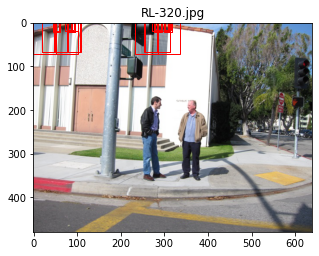

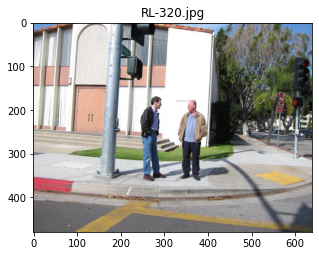

In [16]:
'''
Make predictions on the training set.
'''
preds_train = {}
for i in tqdm(range(len(file_names_train))):

    # read image using PIL:
    I = Image.open(os.path.join(data_path,file_names_train[i]))

    # convert to numpy array:
    I = np.asarray(I)

    preds_train[file_names_train[i]] = detect_red_light_mf(I)
    if len(preds_train[file_names_train[i]]) > 0:
        print(len(preds_train[file_names_train[i]]))
        show_img(I, file_names_train[i], [p[:4] for p in preds_train[file_names_train[i]]])
        show_img(I, file_names_train[i], [])

    

# save preds (overwrites any previous predictions!)
with open(os.path.join(preds_path,'preds_train.json'),'w') as f:
    json.dump(preds_train,f)

In [17]:
if done_tweaking:
    '''
    Make predictions on the test set. 
    '''
    preds_test = {}
    for i in range(len(file_names_test)):

        # read image using PIL:
        I = Image.open(os.path.join(data_path,file_names_test[i]))

        # convert to numpy array:
        I = np.asarray(I)

        preds_test[file_names_test[i]] = detect_red_light_mf(I)

    # save preds (overwrites any previous predictions!)
    with open(os.path.join(preds_path,'preds_test.json'),'w') as f:
        json.dump(preds_test,f)